In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 10 * 10

Generation 1 Max Rewards across runs: [34.03798694 33.71139383 33.1488236  33.42144988 34.53238637 32.45818761
 33.16762484 32.48800515 33.44184368 34.76190254 31.77717679 33.22268897
 33.71460442 32.99073691 33.63885869 33.77364448 33.87057997 34.87925769
 35.1113265  33.0160785 ]
Average Max Reward for Generation 1: 33.558227868921236
Generation 2 Max Rewards across runs: [34.33447316 35.12065893 34.21944105 33.45144699 35.23120219 34.32936171
 34.9749341  35.11213528 35.48326964 36.03030246 34.36332851 35.79704738
 34.26087433 35.39444399 35.29877221 37.87057628 34.25147409 34.507948
 35.57484819 34.43247228]
Average Max Reward for Generation 2: 35.00195053932963
Generation 3 Max Rewards across runs: [36.26265054 37.03233508 36.71068175 35.75237023 36.79541751 36.42492824
 37.63053521 35.62852045 37.20452991 36.95299667 36.93047932 37.55822733
 36.83475977 36.71735228 37.78636061 37.91730436 36.23875627 36.26692806
 36.17405345 36.27411175]
Average Max Reward for Generation 3: 36.75

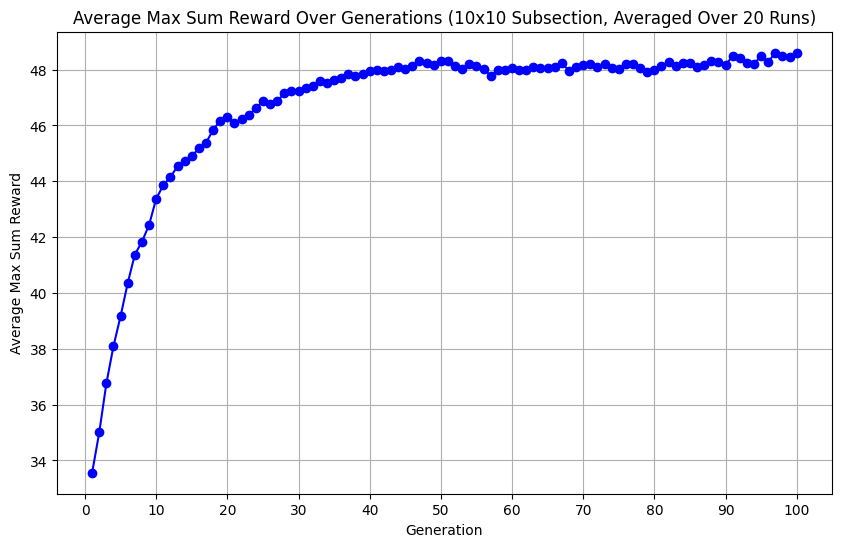

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('/content/drive/MyDrive/finalyr/channel_matrix.csv', delimiter=',')
R = np.loadtxt('/content/drive/MyDrive/finalyr/reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep
num_runs = 20             # Number of runs per generation to calculate average

# Define the fitness function (sum of element-wise multiplication of 10x10 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 10x10 subsection (top-left corner)
    C_subsection = C[:10, :10]
    R_subsection = R[:10, :10]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Store max rewards for each generation across all runs
all_run_max_rewards = np.zeros((num_runs, num_generations))

# Run the genetic algorithm 20 times for averaging
for run in range(num_runs):
    # Initialize the population with random matrices in the range [0, 1]
    population = [np.random.rand(100, 100) for _ in range(population_size)]
    max_rewards = []  # Store max rewards for each generation in this run

    # Evolution process for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for each matrix in the population
        fitness_scores = [fitness_function(C, individual) for individual in population]

        # Store the maximum fitness score for this generation
        max_reward = max(fitness_scores)
        max_rewards.append(max_reward)

        # Select the top-performing individuals
        top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

        # Generate the next generation
        next_generation = []

        # Crossover: Combine pairs of top performers to create new matrices
        while len(next_generation) < population_size:
            parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
            parent1 = population[parent_indices[0]]
            parent2 = population[parent_indices[1]]

            # Randomly choose crossover points
            mask = np.random.rand(100, 100) > 0.5
            child = np.where(mask, parent1, parent2)
            next_generation.append(child)

        # Mutation: Apply random changes to some elements in each matrix
        for individual in next_generation:
            mutation_mask = np.random.rand(100, 100) < mutation_rate
            individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

        # Update the population
        population = next_generation

    # Store the max rewards of this run
    all_run_max_rewards[run, :] = max_rewards

# Calculate the average max rewards across all runs for each generation
avg_max_rewards_per_generation = np.mean(all_run_max_rewards, axis=0)

# Print out each generation's max rewards for each run
for generation in range(num_generations):
    generation_rewards = all_run_max_rewards[:, generation]
    print(f"Generation {generation + 1} Max Rewards across runs: {generation_rewards}")
    print(f"Average Max Reward for Generation {generation + 1}: {avg_max_rewards_per_generation[generation]}")

# Plotting the average maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), avg_max_rewards_per_generation, marker='o', color='b', linestyle='-')
plt.title('Average Max Sum Reward Over Generations (10x10 Subsection, Averaged Over 20 Runs)')
plt.xlabel('Generation')
plt.ylabel('Average Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


## 15 * 15

Generation 1 Max Rewards across runs: [65.33001539 64.30738953 65.27341881 66.80059263 64.75031071 63.88052544
 68.56189064 66.39849964 63.67021771 66.1211498  66.88322846 66.45742797
 68.84900531 65.64622476 64.0140077  65.23585014 63.68247527 65.92416724
 64.80757606 65.91727361]
Average Max Reward for Generation 1: 65.62556234011068
Generation 2 Max Rewards across runs: [67.6758984  68.85362776 68.13615063 69.45709037 66.84059604 66.56865883
 69.32658164 68.36671004 67.19495445 66.41659493 67.55194999 67.33071482
 69.65616618 68.41452232 66.24263674 65.65784286 67.4463969  67.0425549
 67.41200328 67.1726115 ]
Average Max Reward for Generation 2: 67.63821312821742
Generation 3 Max Rewards across runs: [73.04041811 70.0316747  70.94302236 72.63912382 69.74397178 69.27361056
 71.28806706 71.48303373 69.53670518 68.27125984 71.20246474 72.75582608
 71.8943354  72.41590549 69.59515219 67.97175773 70.3203837  71.87373307
 68.5691807  70.31104861]
Average Max Reward for Generation 3: 70.65

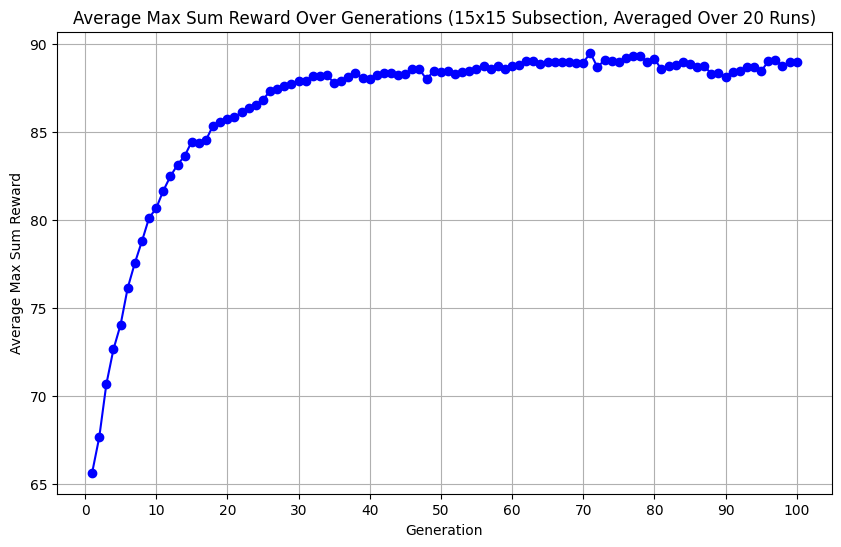

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('/content/drive/MyDrive/finalyr/channel_matrix.csv', delimiter=',')
R = np.loadtxt('/content/drive/MyDrive/finalyr/reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep
num_runs = 20             # Number of runs per generation to calculate average

# Define the fitness function (sum of element-wise multiplication of 15x15 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 15x15 subsection (top-left corner)
    C_subsection = C[:15, :15]
    R_subsection = R[:15, :15]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Store max rewards for each generation across all runs
all_run_max_rewards = np.zeros((num_runs, num_generations))

# Run the genetic algorithm 20 times for averaging
for run in range(num_runs):
    # Initialize the population with random matrices in the range [0, 1]
    population = [np.random.rand(100, 100) for _ in range(population_size)]
    max_rewards = []  # Store max rewards for each generation in this run

    # Evolution process for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for each matrix in the population
        fitness_scores = [fitness_function(C, individual) for individual in population]

        # Store the maximum fitness score for this generation
        max_reward = max(fitness_scores)
        max_rewards.append(max_reward)

        # Select the top-performing individuals
        top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

        # Generate the next generation
        next_generation = []

        # Crossover: Combine pairs of top performers to create new matrices
        while len(next_generation) < population_size:
            parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
            parent1 = population[parent_indices[0]]
            parent2 = population[parent_indices[1]]

            # Randomly choose crossover points
            mask = np.random.rand(100, 100) > 0.5
            child = np.where(mask, parent1, parent2)
            next_generation.append(child)

        # Mutation: Apply random changes to some elements in each matrix
        for individual in next_generation:
            mutation_mask = np.random.rand(100, 100) < mutation_rate
            individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

        # Update the population
        population = next_generation

    # Store the max rewards of this run
    all_run_max_rewards[run, :] = max_rewards

# Calculate the average max rewards across all runs for each generation
avg_max_rewards_per_generation = np.mean(all_run_max_rewards, axis=0)

# Print out each generation's max rewards for each run
for generation in range(num_generations):
    generation_rewards = all_run_max_rewards[:, generation]
    print(f"Generation {generation + 1} Max Rewards across runs: {generation_rewards}")
    print(f"Average Max Reward for Generation {generation + 1}: {avg_max_rewards_per_generation[generation]}")

# Plotting the average maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), avg_max_rewards_per_generation, marker='o', color='b', linestyle='-')
plt.title('Average Max Sum Reward Over Generations (15x15 Subsection, Averaged Over 20 Runs)')
plt.xlabel('Generation')
plt.ylabel('Average Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


## 20 * 20

Generation 1 Max Rewards across runs: [110.75014117 115.10591571 108.46616348 109.04270754 106.86432777
 112.01787328 113.01838267 111.3113472  111.79214123 108.20600558
 111.01043915 113.91358972 108.70307723 108.19755896 109.21841756
 109.84922158 109.3772802  110.8525261  111.88090252 110.66029774]
Average Max Reward for Generation 1: 110.51191582005117
Generation 2 Max Rewards across runs: [113.79990631 115.42708975 114.71786208 111.82250551 113.05246979
 115.24532631 111.71380992 113.45767384 115.89500425 112.93614947
 115.47916799 115.81747319 112.34097177 113.63156619 114.17446964
 113.46405198 115.01714743 117.06814487 114.31196253 114.04129693]
Average Max Reward for Generation 2: 114.17070248750353
Generation 3 Max Rewards across runs: [119.28357329 117.88628665 116.84074624 114.91105665 115.86931667
 116.43229768 114.70775925 117.30371961 116.84236611 118.34284948
 119.89995707 116.97778287 119.95881201 120.45183839 116.35482021
 113.63165081 113.43343063 121.76310832 118.17

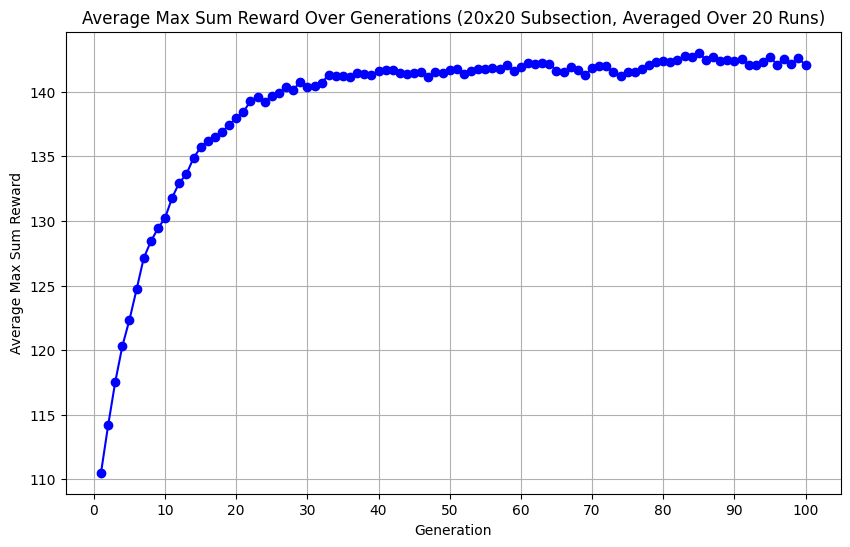

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('/content/drive/MyDrive/finalyr/channel_matrix.csv', delimiter=',')
R = np.loadtxt('/content/drive/MyDrive/finalyr/reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep
num_runs = 20             # Number of runs per generation to calculate average

# Define the fitness function (sum of element-wise multiplication of 20x20 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 20x20 subsection (top-left corner)
    C_subsection = C[:20, :20]
    R_subsection = R[:20, :20]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Store max rewards for each generation across all runs
all_run_max_rewards = np.zeros((num_runs, num_generations))

# Run the genetic algorithm 20 times for averaging
for run in range(num_runs):
    # Initialize the population with random matrices in the range [0, 1]
    population = [np.random.rand(100, 100) for _ in range(population_size)]
    max_rewards = []  # Store max rewards for each generation in this run

    # Evolution process for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for each matrix in the population
        fitness_scores = [fitness_function(C, individual) for individual in population]

        # Store the maximum fitness score for this generation
        max_reward = max(fitness_scores)
        max_rewards.append(max_reward)

        # Select the top-performing individuals
        top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

        # Generate the next generation
        next_generation = []

        # Crossover: Combine pairs of top performers to create new matrices
        while len(next_generation) < population_size:
            parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
            parent1 = population[parent_indices[0]]
            parent2 = population[parent_indices[1]]

            # Randomly choose crossover points
            mask = np.random.rand(100, 100) > 0.5
            child = np.where(mask, parent1, parent2)
            next_generation.append(child)

        # Mutation: Apply random changes to some elements in each matrix
        for individual in next_generation:
            mutation_mask = np.random.rand(100, 100) < mutation_rate
            individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

        # Update the population
        population = next_generation

    # Store the max rewards of this run
    all_run_max_rewards[run, :] = max_rewards

# Calculate the average max rewards across all runs for each generation
avg_max_rewards_per_generation = np.mean(all_run_max_rewards, axis=0)

# Print out each generation's max rewards for each run
for generation in range(num_generations):
    generation_rewards = all_run_max_rewards[:, generation]
    print(f"Generation {generation + 1} Max Rewards across runs: {generation_rewards}")
    print(f"Average Max Reward for Generation {generation + 1}: {avg_max_rewards_per_generation[generation]}")

# Plotting the average maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), avg_max_rewards_per_generation, marker='o', color='b', linestyle='-')
plt.title('Average Max Sum Reward Over Generations (20x20 Subsection, Averaged Over 20 Runs)')
plt.xlabel('Generation')
plt.ylabel('Average Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


Streaming output truncated to the last 5000 lines.
 [0.05009976 0.06559983 0.63564197 0.81364964 0.7203991  0.90148851
  0.95729425 0.87977407 0.98402474 0.58563836]
 [0.37806553 0.99850824 0.95395902 0.43028851 0.82849348 0.91433733
  0.8933592  0.9561619  0.93456116 0.8550212 ]
 [0.13876685 0.88725722 0.68494286 0.71018271 0.04911728 0.90694801
  0.86893483 0.19853644 0.9987952  0.93770835]
 [0.38188398 0.85035382 0.86094234 0.88346996 0.51823281 0.86617617
  0.44662305 0.94485972 0.84595068 0.92601439]
 [0.80802195 0.98725609 0.12889454 0.99222816 0.94036789 0.33804671
  0.86186798 0.99009264 0.80623471 0.86489906]
 [0.08632835 0.95355649 0.90612929 0.80610756 0.97591906 0.57516954
  0.64101215 0.02571815 0.97180837 0.61487294]
 [0.31105223 0.97870213 0.66925471 0.16053535 0.7439762  0.87313028
  0.91405193 0.66683951 0.5496272  0.94440797]]
Generation 98, Run 18: Max Reward = 48.45697730191929
Matrix achieving max reward (10x10 subsection of max individual):
[[0.36543719 0.89150412

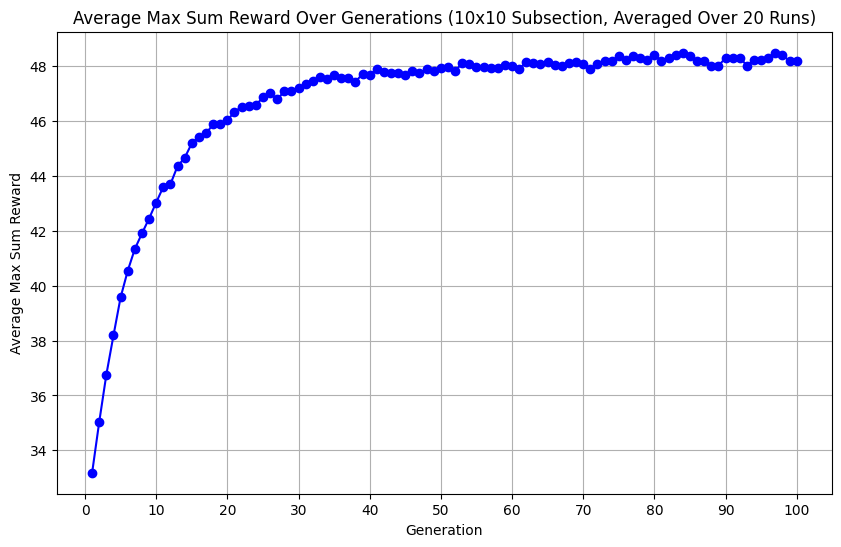

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('/content/drive/MyDrive/finalyr/channel_matrix.csv', delimiter=',')
R = np.loadtxt('/content/drive/MyDrive/finalyr/reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep
num_runs = 20             # Number of runs per generation to calculate average

# Define the fitness function (sum of element-wise multiplication of 10x10 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 10x10 subsection (top-left corner)
    C_subsection = C[:10, :10]
    R_subsection = R[:10, :10]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Store max rewards for each generation across all runs
all_run_max_rewards = np.zeros((num_runs, num_generations))

# Run the genetic algorithm 20 times for averaging
for run in range(num_runs):
    # Initialize the population with random matrices in the range [0, 1]
    population = [np.random.rand(100, 100) for _ in range(population_size)]
    max_rewards = []  # Store max rewards for each generation in this run

    # Evolution process for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for each matrix in the population
        fitness_scores = [fitness_function(C, individual) for individual in population]

        # Store the maximum fitness score and corresponding matrix for this generation
        max_reward = max(fitness_scores)
        max_reward_index = fitness_scores.index(max_reward)  # Identify the matrix with the max reward
        max_individual = population[max_reward_index]  # The individual matrix achieving the max reward

        # Save the max reward for analysis
        max_rewards.append(max_reward)

        # Print max reward details
        print(f"Generation {generation + 1}, Run {run + 1}: Max Reward = {max_reward}")
        print(f"Matrix achieving max reward (10x10 subsection of max individual):\n{max_individual[:10, :10]}")

        # Select the top-performing individuals
        top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

        # Generate the next generation
        next_generation = []

        # Crossover: Combine pairs of top performers to create new matrices
        while len(next_generation) < population_size:
            parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
            parent1 = population[parent_indices[0]]
            parent2 = population[parent_indices[1]]

            # Randomly choose crossover points
            mask = np.random.rand(100, 100) > 0.5
            child = np.where(mask, parent1, parent2)
            next_generation.append(child)

        # Mutation: Apply random changes to some elements in each matrix
        for individual in next_generation:
            mutation_mask = np.random.rand(100, 100) < mutation_rate
            individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

        # Update the population
        population = next_generation

    # Store the max rewards of this run
    all_run_max_rewards[run, :] = max_rewards

# Calculate the average max rewards across all runs for each generation
avg_max_rewards_per_generation = np.mean(all_run_max_rewards, axis=0)

# Print out each generation's max rewards for each run
for generation in range(num_generations):
    generation_rewards = all_run_max_rewards[:, generation]
    print(f"Generation {generation + 1} Max Rewards across runs: {generation_rewards}")
    print(f"Average Max Reward for Generation {generation + 1}: {avg_max_rewards_per_generation[generation]}")

# Plotting the average maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), avg_max_rewards_per_generation, marker='o', color='b', linestyle='-')
plt.title('Average Max Sum Reward Over Generations (10x10 Subsection, Averaged Over 20 Runs)')
plt.xlabel('Generation')
plt.ylabel('Average Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


In [3]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.2 MB/s eta 0:00:00


new 10 * 10

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 1: Max Sum Reward = 3271.55, Avg Sum Reward = 2996.79, Min Sum Reward = 2429.42
Generation 2: Max Sum Reward = 3399.50, Avg Sum Reward = 3135.36, Min Sum Reward = 2750.91
Generation 3: Max Sum Reward = 3499.84, Avg Sum Reward = 3230.17, Min Sum Reward = 2981.43
Generation 4: Max Sum Reward = 3826.96, Avg Sum Reward = 3311.66, Min Sum Reward = 2868.81
Generation 5: Max Sum Reward = 3839.67, Avg Sum Reward = 3417.50, Min Sum Reward = 3102.22
Generation 6: Max Sum Reward = 3879.01, Avg Sum Reward = 3554.63, Min Sum Reward = 3178.25
Generation 7: Max Sum Reward = 4077.49, Avg Sum Reward = 3683.06, Min Sum Reward = 3313.65
Generation 8: Max Sum Reward = 4108.71, Avg Sum Reward = 3785.41, Min Sum Reward = 3479.91
Generation 9: Max Sum Reward = 4284.71, Avg Sum Reward = 3895.17, Min Sum Reward = 3459.11
Generation 10: Max Sum Reward = 4324.05, Avg Sum Reward = 4025.23, Min Sum Reward = 3683.18
Generation 11: Max Sum Reward = 4438.84, Avg Sum Reward = 4128.80, Min Sum Reward = 3842.

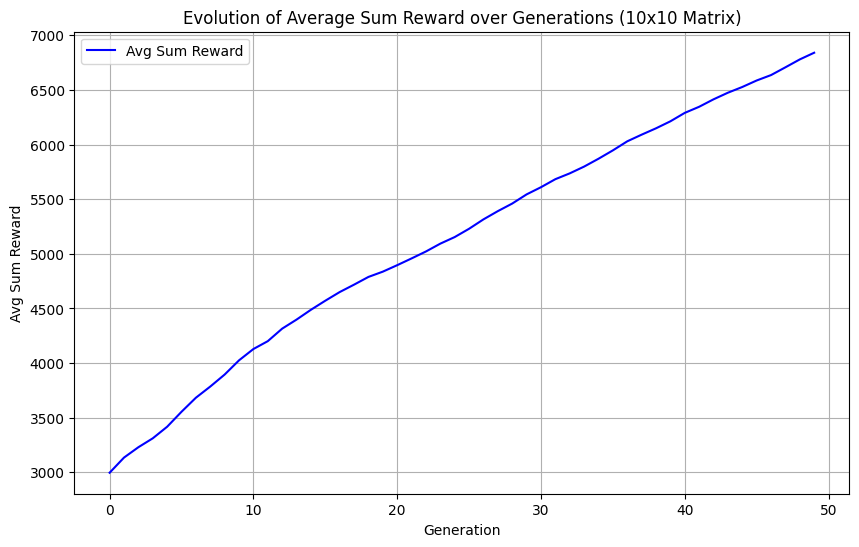

In [5]:
import numpy as np
from deap import base, creator, tools, algorithms
import pandas as pd
import matplotlib.pyplot as plt

# Define the subset size for the 10x10 matrix
subset_size = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 10x10 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)  # Compute the sum for each row
    return np.sum(row_sums)  # Take the sum of all row sums

# Define the genetic algorithm's fitness function to maximize the MSR Reward
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)  # Attribute generator for [0, 1] values
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Tracking statistics
max_sum_rewards = []
avg_sum_rewards = []
min_sum_rewards = []

# Run the genetic algorithm
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards.append(np.max(sum_rewards))
    avg_sum_rewards.append(np.mean(sum_rewards))
    min_sum_rewards.append(np.min(sum_rewards))

    print(f"Generation {gen + 1}: Max Sum Reward = {max_sum_rewards[-1]:.2f}, "
          f"Avg Sum Reward = {avg_sum_rewards[-1]:.2f}, "
          f"Min Sum Reward = {min_sum_rewards[-1]:.2f}")

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(subset_size, subset_size) * 100

# Calculate the MSR Reward for the best individual
final_product_matrix = np.multiply(C, best_individual_matrix)
final_msr_reward = calculate_msr_reward(C, best_individual_matrix)

# Output results
print("Channel matrix C (10x10):\n", C)
print("Initial Reward matrix R (10x10):\n", R)
print("Optimized Reward matrix R_final (Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final Max Sum Reward:", final_msr_reward)

# Plot average sum reward over generations
plt.figure(figsize=(10, 6))
plt.plot(avg_sum_rewards, label="Avg Sum Reward", color="blue")
plt.xlabel("Generation")
plt.ylabel("Avg Sum Reward")
plt.title("Evolution of Average Sum Reward over Generations (10x10 Matrix)")
plt.legend()
plt.grid(True)
plt.show()


## new 15 * 15

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 1: Max Sum Reward = 6721.63, Avg Sum Reward = 6114.69, Min Sum Reward = 5645.19
Generation 2: Max Sum Reward = 6755.33, Avg Sum Reward = 6320.49, Min Sum Reward = 5749.17
Generation 3: Max Sum Reward = 6915.29, Avg Sum Reward = 6488.31, Min Sum Reward = 5994.26
Generation 4: Max Sum Reward = 7286.04, Avg Sum Reward = 6620.11, Min Sum Reward = 5913.38
Generation 5: Max Sum Reward = 7379.69, Avg Sum Reward = 6799.61, Min Sum Reward = 5803.50
Generation 6: Max Sum Reward = 7477.85, Avg Sum Reward = 6982.80, Min Sum Reward = 6504.70
Generation 7: Max Sum Reward = 8035.90, Avg Sum Reward = 7164.44, Min Sum Reward = 6689.02
Generation 8: Max Sum Reward = 8061.19, Avg Sum Reward = 7358.67, Min Sum Reward = 6652.85
Generation 9: Max Sum Reward = 8235.15, Avg Sum Reward = 7572.73, Min Sum Reward = 7053.39
Generation 10: Max Sum Reward = 8289.45, Avg Sum Reward = 7778.41, Min Sum Reward = 7254.66
Generation 11: Max Sum Reward = 8270.23, Avg Sum Reward = 7920.37, Min Sum Reward = 7569.

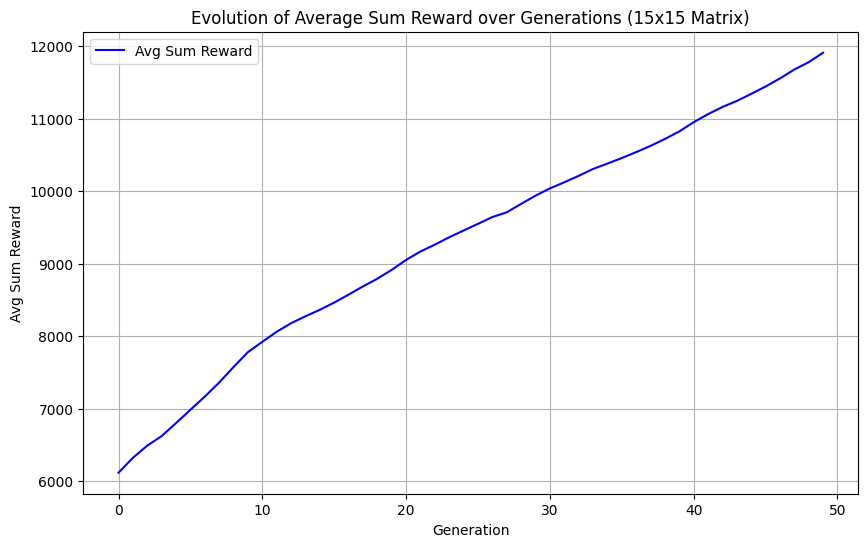

In [6]:
import numpy as np
from deap import base, creator, tools, algorithms
import pandas as pd
import matplotlib.pyplot as plt

# Define the subset size for the 15x15 matrix
subset_size = 15

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 15x15 subset of the full matrices
C = C_full[:subset_size, :subset_size]
R = R_full[:subset_size, :subset_size]

# Normalize the reward matrix to the range [0, 1]
R_normalized = R / 100.0

# Define a function to calculate MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)  # Compute the sum for each row
    return np.sum(row_sums)  # Take the sum of all row sums

# Define the genetic algorithm's fitness function to maximize the MSR Reward
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size, subset_size)
    msr_reward = calculate_msr_reward(C, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)  # Attribute generator for [0, 1] values
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size = 100
population = toolbox.population(n=population_size)
ngen = 50
cxpb = 0.7
mutpb = 0.3

# Tracking statistics
max_sum_rewards = []
avg_sum_rewards = []
min_sum_rewards = []

# Run the genetic algorithm
for gen in range(ngen):
    algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

    sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
    max_sum_rewards.append(np.max(sum_rewards))
    avg_sum_rewards.append(np.mean(sum_rewards))
    min_sum_rewards.append(np.min(sum_rewards))

    print(f"Generation {gen + 1}: Max Sum Reward = {max_sum_rewards[-1]:.2f}, "
          f"Avg Sum Reward = {avg_sum_rewards[-1]:.2f}, "
          f"Min Sum Reward = {min_sum_rewards[-1]:.2f}")

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_individual_matrix = np.array(best_individual).reshape(subset_size, subset_size) * 100

# Calculate the MSR Reward for the best individual
final_product_matrix = np.multiply(C, best_individual_matrix)
final_msr_reward = calculate_msr_reward(C, best_individual_matrix)

# Output results
print("Channel matrix C (15x15):\n", C)
print("Initial Reward matrix R (15x15):\n", R)
print("Optimized Reward matrix R_final (Genetic Algorithm):\n", best_individual_matrix)
print("Final product matrix:\n", final_product_matrix)
print("Final Max Sum Reward:", final_msr_reward)

# Plot average sum reward over generations
plt.figure(figsize=(10, 6))
plt.plot(avg_sum_rewards, label="Avg Sum Reward", color="blue")
plt.xlabel("Generation")
plt.ylabel("Avg Sum Reward")
plt.title("Evolution of Average Sum Reward over Generations (15x15 Matrix)")
plt.legend()
plt.grid(True)
plt.show()


# new 20 * 20

Generation 1: Max Sum Reward = 11271.87, Avg Sum Reward = 10499.17, Min Sum Reward = 9647.73
Generation 2: Max Sum Reward = 11436.11, Avg Sum Reward = 10775.35, Min Sum Reward = 10091.68
Generation 3: Max Sum Reward = 11687.41, Avg Sum Reward = 10987.54, Min Sum Reward = 10502.43
Generation 4: Max Sum Reward = 11860.35, Avg Sum Reward = 11200.26, Min Sum Reward = 10500.70
Generation 5: Max Sum Reward = 12081.30, Avg Sum Reward = 11464.63, Min Sum Reward = 10666.40
Generation 6: Max Sum Reward = 12311.69, Avg Sum Reward = 11653.57, Min Sum Reward = 10904.26
Generation 7: Max Sum Reward = 12311.69, Avg Sum Reward = 11868.16, Min Sum Reward = 11384.18
Generation 8: Max Sum Reward = 12463.37, Avg Sum Reward = 12012.86, Min Sum Reward = 11617.62
Generation 9: Max Sum Reward = 12729.30, Avg Sum Reward = 12163.41, Min Sum Reward = 11812.78
Generation 10: Max Sum Reward = 13010.15, Avg Sum Reward = 12332.99, Min Sum Reward = 11930.95
Generation 11: Max Sum Reward = 13010.15, Avg Sum Reward = 1

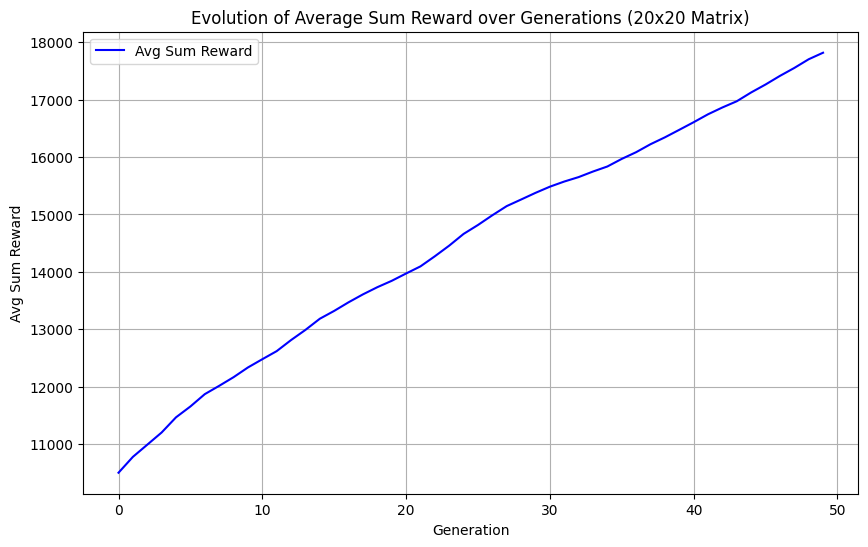

In [4]:
import numpy as np
from deap import base, creator, tools, algorithms
import pandas as pd
import matplotlib.pyplot as plt

# Define the subset size for the 20x20 matrix
subset_size_20 = 20

# Load the channel matrix and reward matrix from CSV files
C_full_20 = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full_20 = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Select a 20x20 subset of the full matrices
C_20 = C_full_20[:subset_size_20, :subset_size_20]
R_20 = R_full_20[:subset_size_20, :subset_size_20]

# Normalize the reward matrix to the range [0, 1]
R_normalized_20 = R_20 / 100.0

# Define a function to calculate MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)  # Compute the sum for each row
    return np.sum(row_sums)  # Take the sum of all row sums

# Define the genetic algorithm's fitness function to maximize the MSR Reward
def fitness(individual):
    R_individual = np.array(individual).reshape(subset_size_20, subset_size_20)
    msr_reward = calculate_msr_reward(C_20, R_individual * 100)  # Scale back to [0, 100]
    return (msr_reward,)

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)  # Attribute generator for [0, 1] values
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size_20 * subset_size_20)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm parameters
population_size_20 = 100
population_20 = toolbox.population(n=population_size_20)
ngen_20 = 50
cxpb_20 = 0.7
mutpb_20 = 0.3

# Tracking statistics
max_sum_rewards_20 = []
avg_sum_rewards_20 = []
min_sum_rewards_20 = []

# Run the genetic algorithm
for gen in range(ngen_20):
    algorithms.eaSimple(population_20, toolbox, cxpb=cxpb_20, mutpb=mutpb_20, ngen=1, verbose=False)

    sum_rewards_20 = [calculate_msr_reward(C_20, np.array(ind).reshape(subset_size_20, subset_size_20) * 100) for ind in population_20]
    max_sum_rewards_20.append(np.max(sum_rewards_20))
    avg_sum_rewards_20.append(np.mean(sum_rewards_20))
    min_sum_rewards_20.append(np.min(sum_rewards_20))

    print(f"Generation {gen + 1}: Max Sum Reward = {max_sum_rewards_20[-1]:.2f}, "
          f"Avg Sum Reward = {avg_sum_rewards_20[-1]:.2f}, "
          f"Min Sum Reward = {min_sum_rewards_20[-1]:.2f}")

# Extract the best individual
best_individual_20 = tools.selBest(population_20, k=1)[0]
best_individual_matrix_20 = np.array(best_individual_20).reshape(subset_size_20, subset_size_20) * 100

# Calculate the MSR Reward for the best individual
final_product_matrix_20 = np.multiply(C_20, best_individual_matrix_20)
final_msr_reward_20 = calculate_msr_reward(C_20, best_individual_matrix_20)

# Output results
print("Channel matrix C (20x20):\n", C_20)
print("Initial Reward matrix R (20x20):\n", R_20)
print("Optimized Reward matrix R_final (Genetic Algorithm):\n", best_individual_matrix_20)
print("Final product matrix:\n", final_product_matrix_20)
print("Final Max Sum Reward:", final_msr_reward_20)

# Plot average sum reward over generations
plt.figure(figsize=(10, 6))
plt.plot(avg_sum_rewards_20, label="Avg Sum Reward", color="blue")
plt.xlabel("Generation")
plt.ylabel("Avg Sum Reward")
plt.title("Evolution of Average Sum Reward over Generations (20x20 Matrix)")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 1 for 10x10: Avg Sum Reward = 3040.39
Generation 2 for 10x10: Avg Sum Reward = 3160.99
Generation 3 for 10x10: Avg Sum Reward = 3261.56
Generation 4 for 10x10: Avg Sum Reward = 3353.85
Generation 5 for 10x10: Avg Sum Reward = 3453.39
Generation 6 for 10x10: Avg Sum Reward = 3547.93
Generation 7 for 10x10: Avg Sum Reward = 3628.05
Generation 8 for 10x10: Avg Sum Reward = 3715.07
Generation 9 for 10x10: Avg Sum Reward = 3814.12
Generation 10 for 10x10: Avg Sum Reward = 3910.63
Generation 11 for 10x10: Avg Sum Reward = 3991.51
Generation 12 for 10x10: Avg Sum Reward = 4043.93
Generation 13 for 10x10: Avg Sum Reward = 4099.70
Generation 14 for 10x10: Avg Sum Reward = 4151.21
Generation 15 for 10x10: Avg Sum Reward = 4218.87
Generation 16 for 10x10: Avg Sum Reward = 4313.95
Generation 17 for 10x10: Avg Sum Reward = 4391.06
Generation 18 for 10x10: Avg Sum Reward = 4467.33
Generation 19 for 10x10: Avg Sum Reward = 4566.36
Generation 20 for 10x10: Avg Sum Reward = 4643.17
Generatio

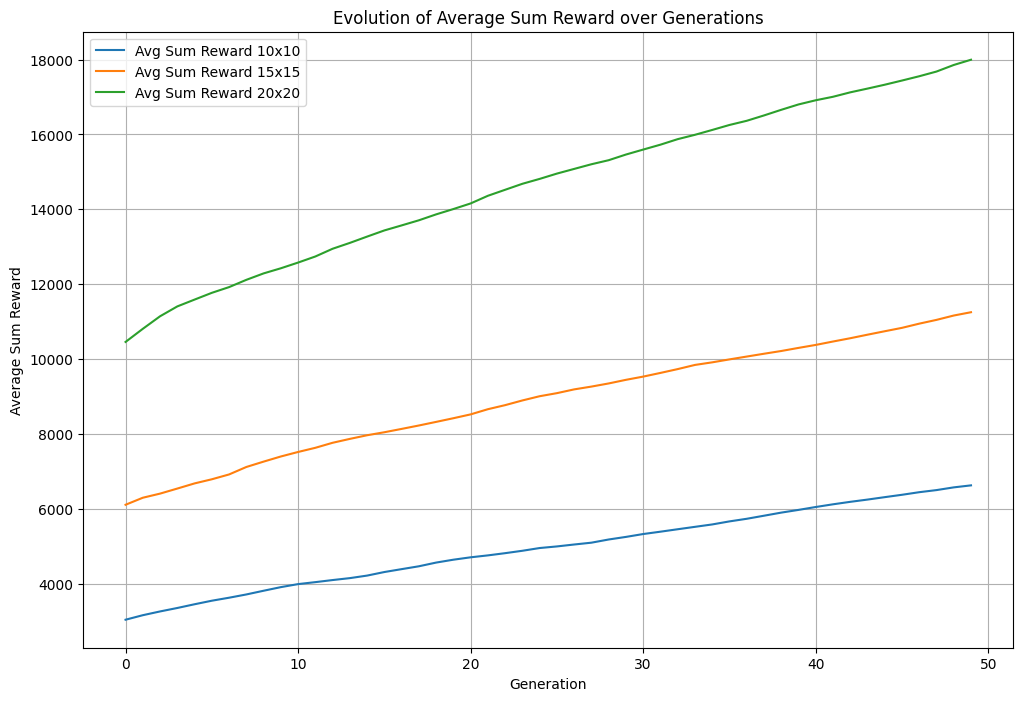

In [7]:
import numpy as np
from deap import base, creator, tools, algorithms
import pandas as pd
import matplotlib.pyplot as plt

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Define a function to calculate MSR based on the row-wise summation
def calculate_msr_reward(C, R):
    row_sums = np.sum(C * R, axis=1)  # Compute the sum for each row
    return np.sum(row_sums)  # Take the sum of all row sums

# Genetic Algorithm setup
def run_genetic_algorithm(subset_size, C, R, population_size=100, ngen=50, cxpb=0.7, mutpb=0.3):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)  # Attribute generator for [0, 1] values
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=subset_size * subset_size)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", lambda ind: (calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100),))
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.15, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=population_size)

    # Tracking statistics
    avg_sum_rewards = []

    # Run the genetic algorithm
    for gen in range(ngen):
        algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=1, verbose=False)

        sum_rewards = [calculate_msr_reward(C, np.array(ind).reshape(subset_size, subset_size) * 100) for ind in population]
        avg_sum_rewards.append(np.mean(sum_rewards))

        print(f"Generation {gen + 1} for {subset_size}x{subset_size}: Avg Sum Reward = {avg_sum_rewards[-1]:.2f}")

    return avg_sum_rewards

# Prepare to plot results
matrix_sizes = [10, 15, 20]
avg_rewards_all = {}

# Run the genetic algorithm for each matrix size
for size in matrix_sizes:
    C = C_full[:size, :size]
    R = R_full[:size, :size]
    avg_rewards_all[size] = run_genetic_algorithm(size, C, R)

# Plotting all average rewards in one plot
plt.figure(figsize=(12, 8))

for size in matrix_sizes:
    plt.plot(avg_rewards_all[size], label=f"Avg Sum Reward {size}x{size}")

plt.xlabel("Generation")
plt.ylabel("Average Sum Reward")
plt.title("Evolution of Average Sum Reward over Generations")
plt.legend()
plt.grid(True)
plt.show()
